In [41]:
getwd()

[1] "/Users/millera2/millera2.github.io/CS-111"

In [42]:
library(tidyverse)

In [43]:
counted2015 <- read_csv("../Data/counted2015.csv")
counted2016 <- read_csv("../Data/counted2016.csv")
counted <- rbind(counted2015, counted2016)

Parsed with column specification:
cols(
  uid = col_double(),
  name = col_character(),
  age = col_character(),
  gender = col_character(),
  raceethnicity = col_character(),
  armed = col_character(),
  month = col_character(),
  day = col_double(),
  year = col_double(),
  streetaddress = col_character(),
  city = col_character(),
  state = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  classification = col_character(),
  lawenforcementagency = col_character()
)

Parsed with column specification:
cols(
  uid = col_double(),
  name = col_character(),
  age = col_character(),
  gender = col_character(),
  raceethnicity = col_character(),
  armed = col_character(),
  month = col_character(),
  day = col_double(),
  year = col_double(),
  streetaddress = col_character(),
  city = col_character(),
  state = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  classification = col_character(),
  lawenforcementagency = col_character()
)



In [44]:
head(counted)

uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.06669,-81.16788,Death in custody,Chatham County Sheriff's Office
4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.48747,-122.89170,Gunshot,Washington County Sheriff's Office
5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.93335,-159.64197,Struck by vehicle,Kauai Police Department
6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.69380,-97.28055,Gunshot,Wichita Police Department
7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.24653,-123.11950,Gunshot,Mason County Sheriff's Office
8,Matthew Hoffman,32,Male,White,Non-lethal firearm,January,4,2015,630 Valencia St,San Francisco,CA,37.76285,-122.42200,Gunshot,San Francisco Police Department


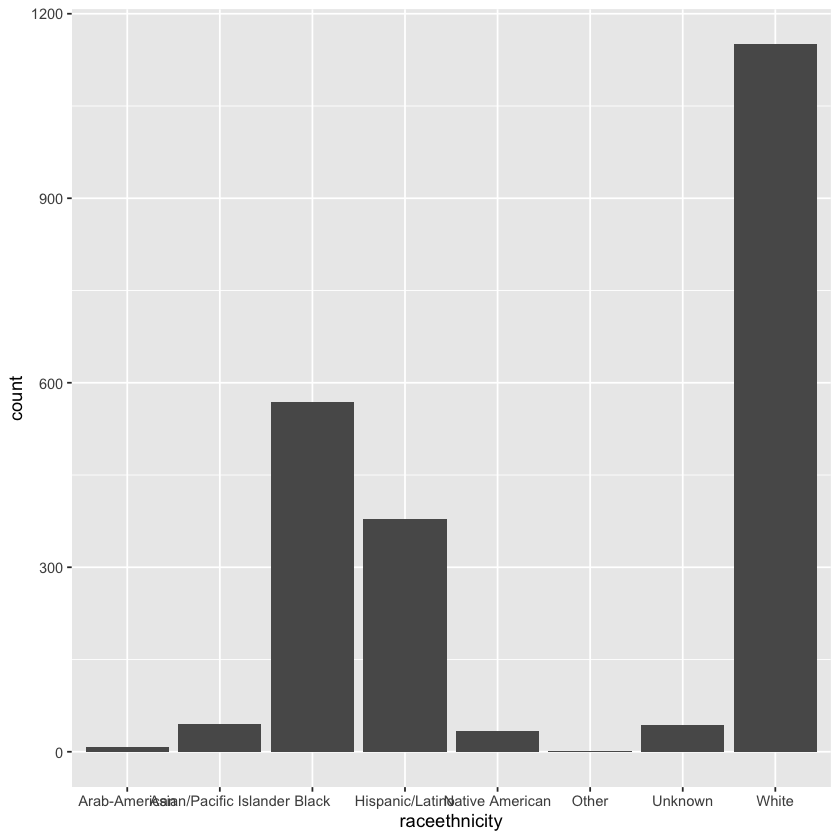

In [45]:
counted %>% ggplot(aes(raceethnicity))+geom_bar()

In [46]:
unarmed <- counted %>% filter(armed == "No") 

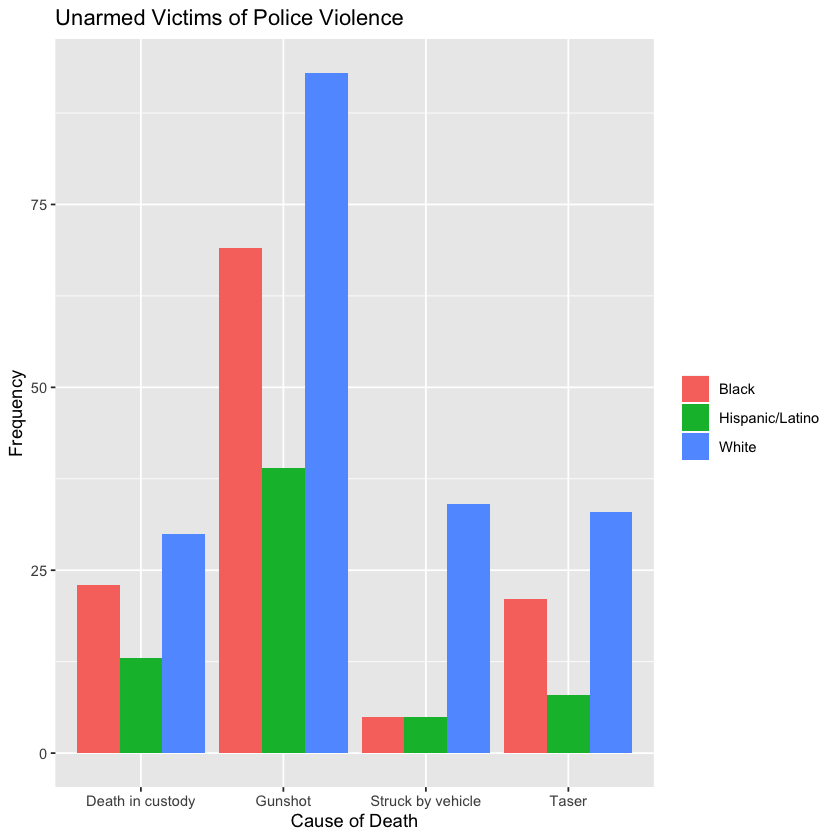

In [47]:
unarmed %>% filter(raceethnicity == "Black" | 
                   raceethnicity == "White" | 
                   raceethnicity == "Hispanic/Latino") %>% 
            filter(classification !="Other") %>%
            ggplot(aes(classification, fill=raceethnicity))+
                geom_bar(position="dodge") +
                labs(x = "Cause of Death", 
                     y="Frequency", 
                     title="Unarmed Victims of Police Violence")+
                theme(legend.title = element_blank())

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


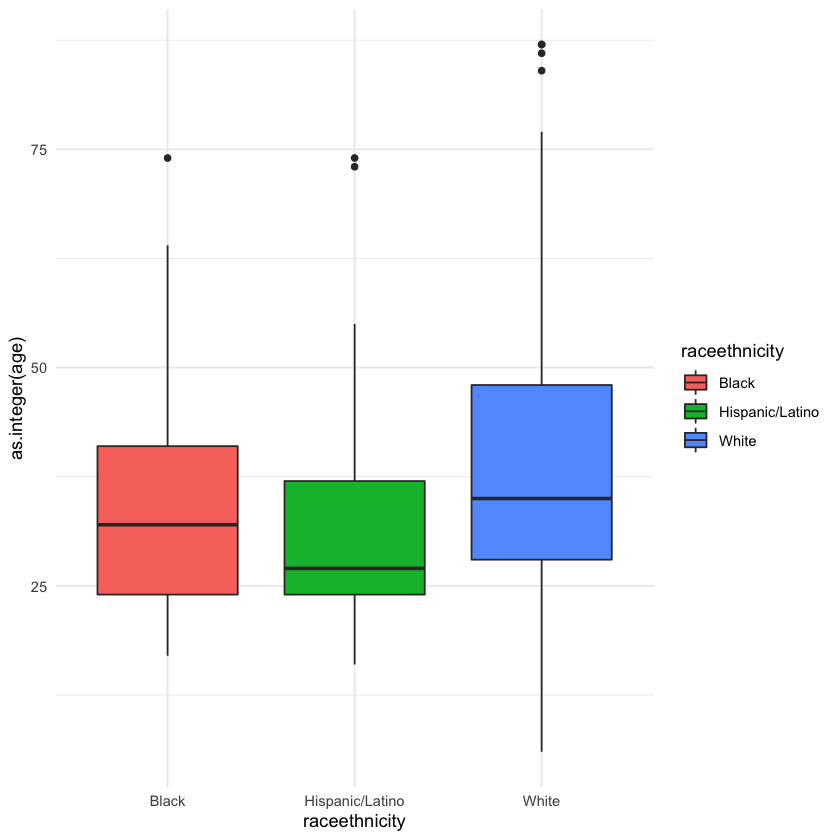

In [48]:
unarmed %>% filter(raceethnicity == "Black" | 
                   raceethnicity == "White" | 
                   raceethnicity == "Hispanic/Latino") %>% 
            ggplot(aes( raceethnicity, as.integer(age), fill=raceethnicity))+geom_boxplot()+theme_minimal()

Warning message:
“Removed 10 rows containing missing values (geom_point).”


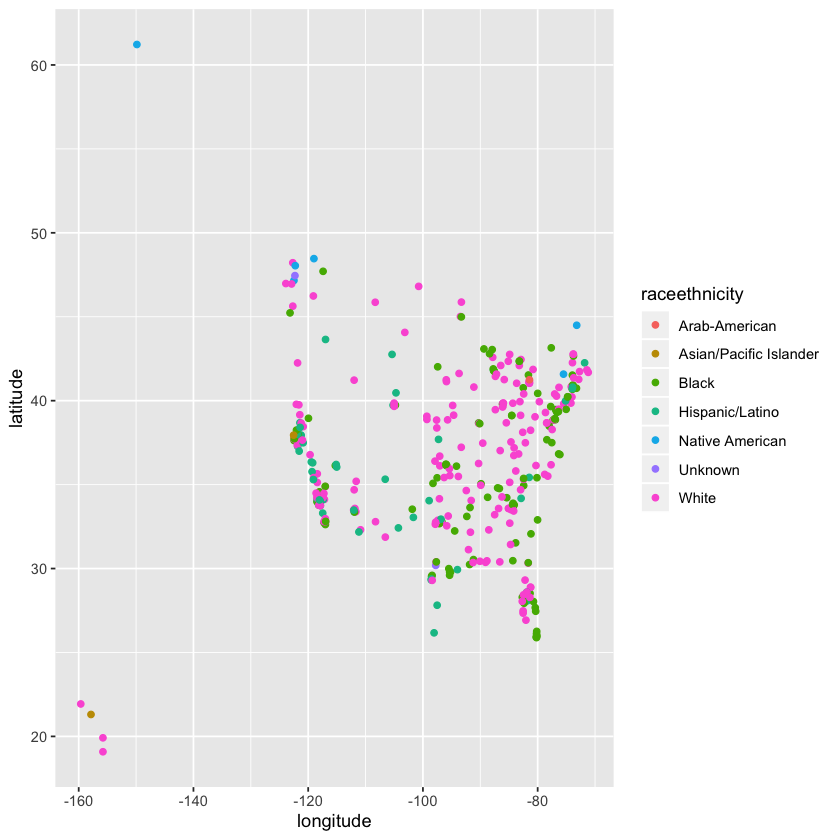

In [49]:
unarmed %>% ggplot(aes(longitude, latitude, color=raceethnicity))+geom_point() 

In [50]:
head(counted)

uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.06669,-81.16788,Death in custody,Chatham County Sheriff's Office
4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.48747,-122.89170,Gunshot,Washington County Sheriff's Office
5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.93335,-159.64197,Struck by vehicle,Kauai Police Department
6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.69380,-97.28055,Gunshot,Wichita Police Department
7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.24653,-123.11950,Gunshot,Mason County Sheriff's Office
8,Matthew Hoffman,32,Male,White,Non-lethal firearm,January,4,2015,630 Valencia St,San Francisco,CA,37.76285,-122.42200,Gunshot,San Francisco Police Department


In [51]:
counted %>% group_by(raceethnicity, armed) %>% count()

raceethnicity,armed,n
<chr>,<chr>,<int>
Arab-American,Firearm,2
Arab-American,Knife,2
Arab-American,No,2
Arab-American,Unknown,1
Asian/Pacific Islander,Firearm,14
Asian/Pacific Islander,Knife,15
Asian/Pacific Islander,No,5
Asian/Pacific Islander,Non-lethal firearm,1
Asian/Pacific Islander,Other,5


In [57]:
counted2 <- counted %>% filter(raceethnicity == "White" |
                               raceethnicity == "Black" |
                               raceethnicity == "Hispanic/Latino")

table(counted2$raceethnicity, counted2$armed) %>% addmargins

,Disputed,Firearm,Knife,No,Non-lethal firearm,Other,Unknown,Vehicle,Sum
Black,12,279,57,119,22,23,30,26,568
Hispanic/Latino,1,161,65,65,12,31,33,10,378
White,2,560,154,190,57,67,83,37,1150
Sum,15,1000,276,374,91,121,146,73,2096


In [55]:
(119/568)/(190/1150)

[1] 1.268069

In [54]:
568/2226

[1] 0.2551662

In [59]:
119/(190+119)

[1] 0.3851133

In [60]:
1/1.27

[1] 0.7874016